<a href="https://colab.research.google.com/github/mansi05-t/Forest-Fires/blob/master/Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Fires





![picture](https://drive.google.com/uc?id=1TGdvH6RaSMzJuaqYhPsD9f51x8zmwu-O)





**Objective**

Forest fires help in the natural cycle of woods' growth and replenishment. They Clear dead trees, leaves, and competing vegetation from the forest floor, so new plants can grow. Remove weak or disease-ridden trees, leaving more space and nutrients for stronger trees.

But when fires burn too hot and uncontrollable or when they’re in the “wildland-urban interface” (the places where woodlands and homes or other developed areas meet), they can be damaging and life threatning.
In this kernel, our aim is to predict the burned area (area) of forest fires, in the northeast region of Portugal. Based on the the spatial, temporal, and weather variables where the fire is spotted. The prediction can be used for calculating the forces sent to the incident and deciding the urgency of the situation.

In [ ]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
files = files.upload()

In [ ]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

# Describing the data

In [ ]:
df.shape

(517, 13)

Our dataset has 517 rows and 13 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


The training-set has 517 examples and 12 features + the target variable (area).

2 of the features are objects, 3 are integers and 8 are floats.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


# Attribute Information:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4

13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

# Exploratory Data Analysis

# Univariate

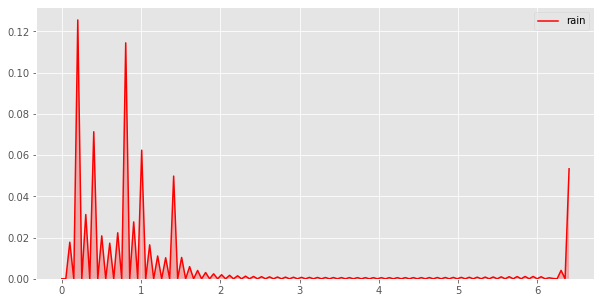

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['rain'],shade=True,color='r')
plt.show()

In [ ]:
target = 'area'

Skew: 12.846933533934868
Kurtosis: 194.1407210942299 



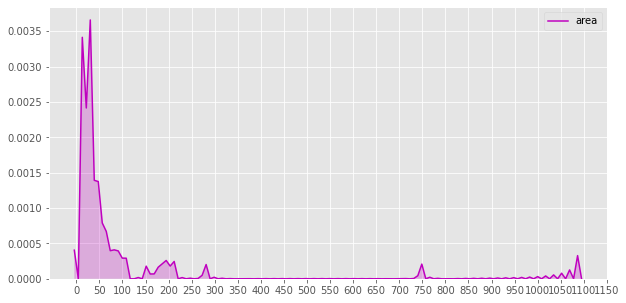

In [ ]:
plt.figure(figsize=(10,5))
print("Skew: {}".format(df[target].skew()))
print("Kurtosis: {}".format(df[target].kurtosis()),'\n')
ax = sns.kdeplot(df[target],shade=True,color='m')
plt.xticks([i for i in range(0,1200,50)])
plt.show()



Majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

Most of the dataset's samples fall between 0 and 200 of 'Area' output class, with majority being less than 100

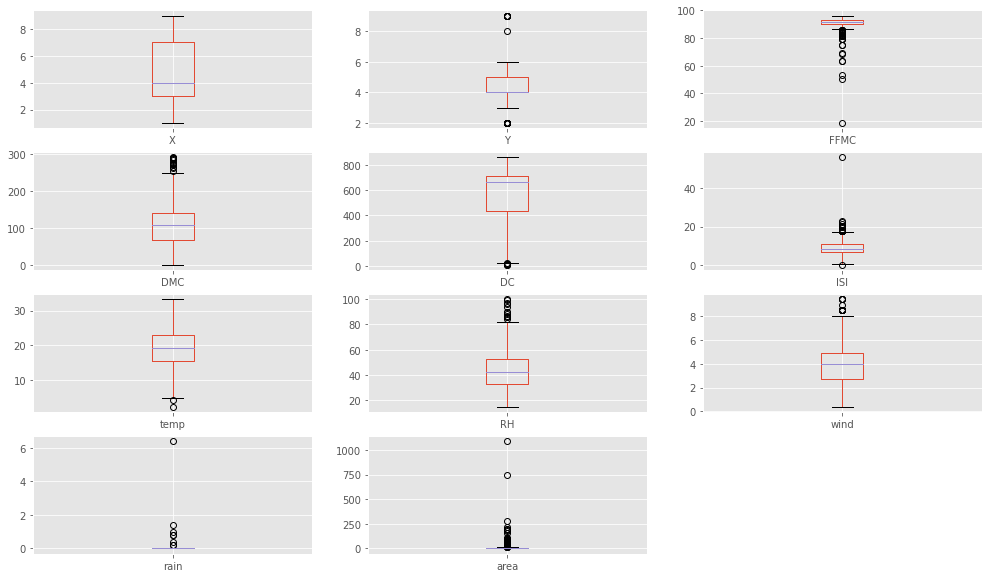

In [ ]:
df.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False,  figsize=(17,10))
plt.show()

In [ ]:
pd.DataFrame(data=[df.skew(),df.kurtosis()],index=['skewness','kurtosis'])

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721


We can see that there are outliers, Skewness and kurtosis (high positive or negative) in some features rain, area, FFMC and ISI.


The Rain is highly skewed with a value of +19.81 and huge kurtosis value of 421.

The Area is also skewed with a value of +12.84 and huge kurtosis value of 194.

**Separating the data into Categorical and Numeric**

In [ ]:
dfa = df.drop(columns=target)
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

In [ ]:
cat_columns

['month', 'day']

In [ ]:
num_columns

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

**Introducing new column**

In [ ]:
# a categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


**Total no. of fires, Monthwise and Daywise**

In [ ]:
print('Months', df.month.value_counts(), sep='\n')
print('\n')
print('Days', df.day.value_counts(), sep='\n')

Months
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64


Days
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


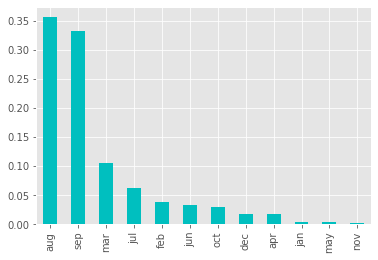

In [ ]:
df['month'].value_counts(normalize = True).plot.bar(color = 'c')
plt.show()

Most number of fires happened in the month of August(184) and September(172).

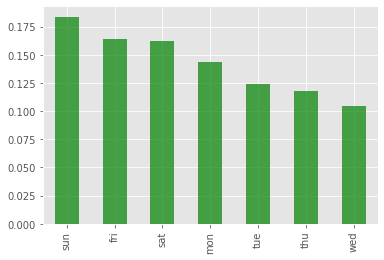

In [ ]:
df['day'].value_counts(normalize = True).plot.bar(color = 'g' , alpha = 0.7)
plt.show()

95 forest fires happened on Sunday and 85 on Friday.

**Total Area affected by forest fires on monthly basis**

In [ ]:
# Creating the top 10 dataframe
fires = df.groupby(by = 'month')['area'].sum().sort_values(ascending = False).head(10).reset_index()
fires = fires.sort_values(by = 'area', ascending = False)
fires

,month,area
0,sep,3086.13
1,aug,2297.99
2,jul,459.83
3,mar,235.26
4,feb,125.50
5,dec,119.97
6,oct,99.57
7,jun,99.30
8,apr,80.02
9,may,38.48


No handles with labels found to put in legend.


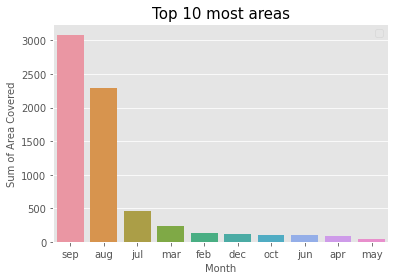

In [ ]:
# plot
ax = sns.barplot(x = fires['month'], y = fires['area'])

# Make pretty
plt.title("Top 10 most areas", fontsize = 15)
plt.xlabel("Month", fontsize = 10)
plt.ylabel("Sum of Area Covered", fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10)
plt.show()

From the above graph we can see that, Most number of fires happened in august but the more damage happened in september

# Bivariate Analysis

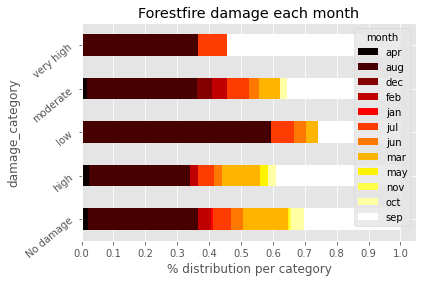

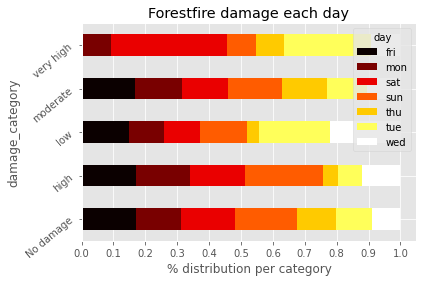

In [ ]:
for col in cat_columns:
    cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
plt.show()

Previously we had observed that August and September had the most number of forest fires.

And from the above plot of month, we can understand few things

* Most of the fires in August were low (< 1 hectare).
* The very high damages(>100 hectares) happened in only 3 months - august,july and september.


# Correlation Plot

In [ ]:
df.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


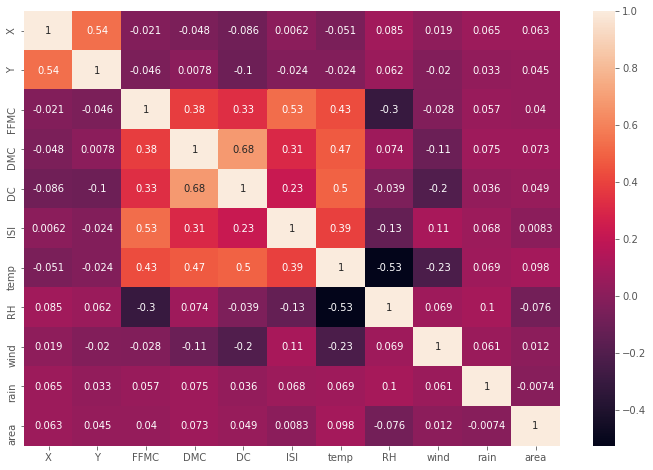

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot = True , ax=ax)
plt.show()

'temp' has the highest correlation with the area of forest fire(which is a positive correlation), however, 'Rain' has the least (Negative correlation).

'temp' has the postive correlation with 'FFMC' and 'ISI'.

#Outlier treatment

We had observed outliers in the following columns:

1. area
2. FFMC
3. ISI
4. rain

In [ ]:
out_columns = ['area','FFMC','ISI','rain']

However, the above outliers are not error values so we cannot remove it.

In order to minimize the effect of outliers in our model we will transform the above features.

# Preparing the data for modelling

In [ ]:
df1 = pd.get_dummies(df,columns=['day','month'])

In [ ]:
print(df1[out_columns].describe().T)
np.log1p(df1[out_columns]).skew(), np.log1p(df1[out_columns]).kurtosis()

      count       mean        std   min   25%    50%      75%      max
area  510.0  13.001431  64.076634   0.0   0.0   0.58   6.5775  1090.84
FFMC  510.0  91.130588   3.126094  75.1  90.3  91.65  92.9000    96.20
ISI   510.0   9.137843   4.480488   1.1   6.7   8.40  11.0000    56.10
rain  510.0   0.015686   0.124381   0.0   0.0   0.00   0.0000     1.00


(area    1.208492
 FFMC   -1.803993
 ISI    -0.434372
 rain    7.818265
 dtype: float64, area     0.923414
 FFMC     4.866747
 ISI      1.122574
 rain    59.358024
 dtype: float64)

In [ ]:
from scipy.stats import zscore
# FFMC and rain are still having high skew and kurtosis values, 
# since we will be using Linear regression model we cannot operate with such high values
# so for FFMC we can remove the outliers in them using z-score method
mask = df1.loc[:,['FFMC']].apply(zscore).abs() < 3

# Since most of the values in rain are 0.0, we can convert it as a categorical column
df1['rain'] = df1['rain'].apply(lambda x: int(x > 0.0))

df1 = df1[mask.values]
df1.shape

(499, 31)

In [ ]:
out_columns.remove('rain')
df1[out_columns] = np.log1p(df1[out_columns])

In [ ]:
df1[out_columns].skew()

area    1.233024
FFMC   -1.142404
ISI    -0.165757
dtype: float64

In [ ]:
# we will use this dataframe for building our ML model
df_ml = df1.drop(columns=['damage_category']).copy()

# Models

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [ ]:
X1 = df_ml.drop(columns=['area'])
Y1 = df_ml['area']

In [ ]:
num_instances = len(X)

models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Bagging Regressor', BaggingRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X1, Y1)
    
    predictions = model.predict(X1)
    
    # Evaluate the model
    score = explained_variance_score(Y1, predictions)
    mae = mean_absolute_error(predictions, Y1)
    results.append(mae)
    names.append(name)
    
    msg = "%s: "'\n' "Score: %.2f%% "'\n' "Mean_Abs_Error : (%f)" '\n' % (name, score, mae)
    print(msg)

Linear Regression: 
Score: 0.08% 
Mean_Abs_Error : (1.092803)

Bagging Regressor: 
Score: 0.81% 
Mean_Abs_Error : (0.447815)

ExtraTreesRegressor: 
Score: 0.99% 
Mean_Abs_Error : (0.018138)

Random Forest: 
Score: 0.84% 
Mean_Abs_Error : (0.447632)

KNN: 
Score: 0.22% 
Mean_Abs_Error : (0.977451)

CART: 
Score: 0.99% 
Mean_Abs_Error : (0.018138)

SVM: 
Score: 0.01% 
Mean_Abs_Error : (1.076906)



Decision Tree and Extra Tree Regressor are the best estimators/models for this dataset, followed by Random Forest. 